<a href="https://colab.research.google.com/github/samho22/QTM350/blob/main/TricoloreProjectBlog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyzing the Accuracy of Amazon Translate Service using Different Languages**



Hello everyone! Welcome to Tricolore's QTM 350 Final Project Blog. Here, we will walk you through our project in its entirety and take you on our journey of analyzing Amazon Translate's ML API. 

## What is Amazon Translate?

Amazon Translate is based on neural networks trained for language translation. This program allows users to translate between a given source language and a target language by inputing a source text and receiving an output text in the target language.

## **Who Are We & Why Did We Choose AWS Translate?**

We are a group of four bilingual Emory Students who come from different cultural backgrounds. After having to learn both English and our second native language growing up, we wanted to know if AWS Translate would be a good resource in helping learn English and another language. In other words, we were interested in determining just how well AWS Translate can translate English phrases into our native languages of Hindi, Tagalog, Mandarin and Korean. 


Additionally, because we noticed that all of us speak Asian languages, we wanted to compare how accurate AWS Translate is when working with non-Asian languages versus Asian languages. 

## **Experimenting with AWS Translate**

One of our group members speaks native Korean and has studied Spanish for 7 years, so we decided to test the accuracy and fluency of the AWS translations using these two languages. We translated two greetings: "Hey! What's up?" and "Hello, how are you?". 

The Korean AWS translations were much less fluent than the Spanish translations. The first Korean translation was mostly accurate, but the translation for the second Korean phrase was not an accurate formal greeting: it would not be appropriate to greet an elder with this translation. In contrast, both Spanish translations were mostly accurate and fluent. 

We wanted to test the AWS model on more languages and see if this trend between informal vs. formal translations would appear. We also wanted to see if the AWS model struggled more with fluency in Asian lanugages instead of European languages due to the large differences in grammar and structure from the original English input and also includes image characters versus just the alphabet. 

## **Our Hypotheses**

1.  Spanish will be translated most accurately. 
2.   Asian languages will be less accurately translated than Non-Asian languages as tenses are more complicated and characters are harder to translate than words. 
3. Informal phrases will be less accurately translated because a computer program can’t support all the nuances of regional dialect and slang terms.


### Getting started 

Setting up an IAM role 
In order to use this API within Sagemaker, we will need to update the Role we have been using to control Sagemaker permissions. Recall, when you created your Sagemaker instance, one of the steps was creating a new IAM Role. If you used the suggested default, the name would be similar to AmazonSageMaker-ExecutionRole-0238127377.

Under the heading "Permissions and encryption" in your desired notebook instance, click the link to the IAM role ARN.

![picture](https://drive.google.com/uc?export=view&id=1eiTQtYPQSI2XNjUkyijksah-QYb8Hv0g)

### Adding policies
To use the examples we will present for working with Amazong Translate, you will need to add TranslateFullAccess permissions. This permission is required to work with the AWS translate function. 

To add it, in the IAM role Summary page (pictured in the screenshot below), click the blue "Attach policies" button. In the search bar, type TranslateFullAccess, select it by ticking the empty white box next to the name when it appears, and then click the blue "Attach policy" button.

![picture](https://drive.google.com/uc?export=view&id=12v8Zc3cv2uDL30wBKCS37pDjX5cbDDG8)


## Working with the Translate API ML service in SDK Python
**Step 1: Setup**

To use the translate service in practical situations within buisness or personal needs, we will be writing python code and using the AWS service given to us. Therefore, we need to import boto3 in order to integrate your Python application, library, or script with AWS services (the translate service we will be using). Also, import json so we store the translated text into json files.

In [ ]:
import boto3
import json

**Step 2: Storing the text you want to translate**

First, we need to create a dictionary with three kets: Text, SourceLanguageCode, and TargetLanguageCode. The Text key will store the text that you wish to translate. The SourceLanguageCode will store the language of the original text. TargetLanguageCode will store the language you wish to translate the text to.

AWS translate offers many languages. You can find the language codes [here](https://docs.aws.amazon.com/translate/latest/dg/what-is.html).

In this example, we will be translating "Hey! What's up?" from English to Korean.

In [ ]:
Amazon_Translate = {
    "Text": "Hey! What's up?", 
    "SourceLanguageCode": "en", 
    "TargetLanguageCode": "ko"
}

Now, we are going to save this dictionary as a json file.



In [ ]:
with open('Amazon_Translate.json', 'w') as fp:
    json.dump(Amazon_Translate, fp)

![picture](https://drive.google.com/uc?export=view&id=1NwqxA-Oc5rINpstBh4BiNn_Oxs7ZXTXE)

Using boto3, we can call the Translate API. We are using the translate-text function in order to translate the text. This will save a new json file with the translated text. I suggest naming the new json file as yourfilename_translated, so you know it is the new json with the translations.



In [ ]:
!aws translate translate-text \
            --region us-east-1 \
            --cli-input-json file://Amazon_Translate.json > Amazon_Translate_Translated.json

![picture](https://drive.google.com/uc?export=view&id=1e8xWTUKRRhK8TKCb62lkEhu9xNb7M20S)


## **Using AWS Translate to Translate Formal and Casual/Slang English Phrases**

The following are the list of phrases that we used for our translations. There are two pairs of translations. As you can see, the formal phrase and the slang phrase for each grouping convey the same message, just using different words. 

*  **Formal Phrase 1**: Please accept my sincere apology for the mixup about your Starbucks order. I will gladly make you a new drink. 
*  **Slang Phrase 1**: Hey, my bad for messing up your Starbucks drink, so sorry. I can make you a new one if you want? 
*  **Formal Phrase 2**: Hello! I wanted to confirm that you all were still available to meet tonight? It will be a casual event, however, I am in need of transportation to the function.

*  **Slang Phrase 2**: Yo! Are you guys still down to chill tonight? It’s gonna be super low key, but I kinda need a ride to the party.


### Batch Translations using Amazon Translate


#### Phrase Input
To translate these four phrases in a more efficient manner, we used the batch translate feature in the Amazon Translate service. First, to use this service, we need to store all of the phrases as a text file in an S3 Bucket. S3 is another service in AWS that you can learn about on the [AWS website. ](https://docs.aws.amazon.com/AmazonS3/latest/userguide/GetStartedWithS3.html)

Log into your AWS account and go to the S3 service. From there, create a new bucket for this task. To do this, click Create Bucket in the top right-hand corner and choose the permissions that you want. This bucket will contain all of the phrases, texts, documents, etc. that you would like to translate. 


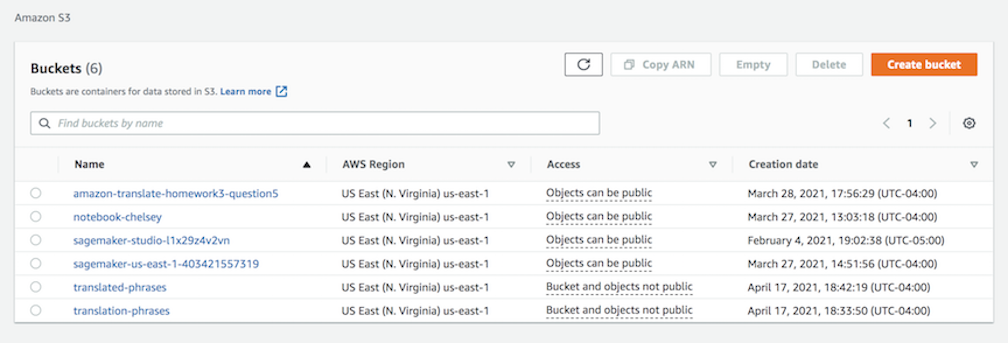

For batch translation service to work, you must create a new folder in the bucket. To do this, click Create folder in the top right-hand corner. We created a new folder called Phrases.

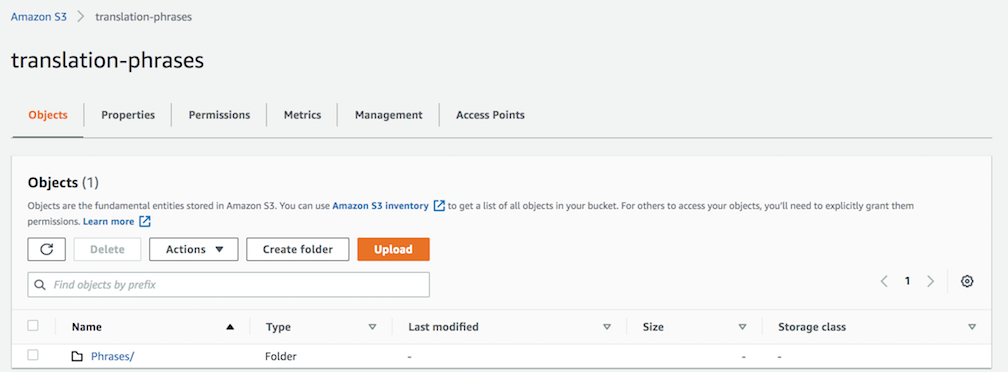

In this folder, drag and drop your files with the phrases you would like to translate. Keep in mind that all of the files within the folder should be the same format. You should find all of the files you have uploaded where it says Objects. We upload four text files with the four phrases that we would like to see translated.

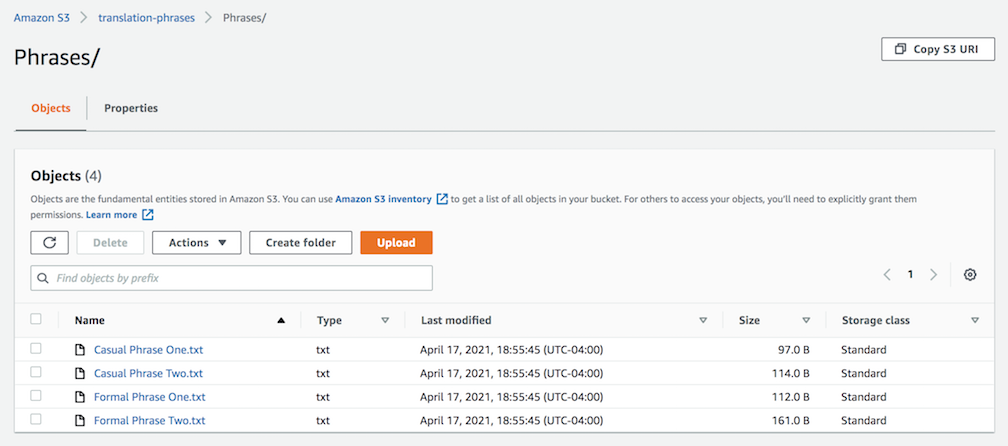

#### Phrase Output
Now that we have a bucket with everything we would like to translate, we need to create a bucket to store all of the translations. Create a new bucket and choose the permissions that you want. Again, you must create a new folder in the bucket. In our case, because we would like all of the phrases to be translated into eight different languages, we created eight different folders. This bucket will contain all of the phrases, texts, documents, etc. translated.

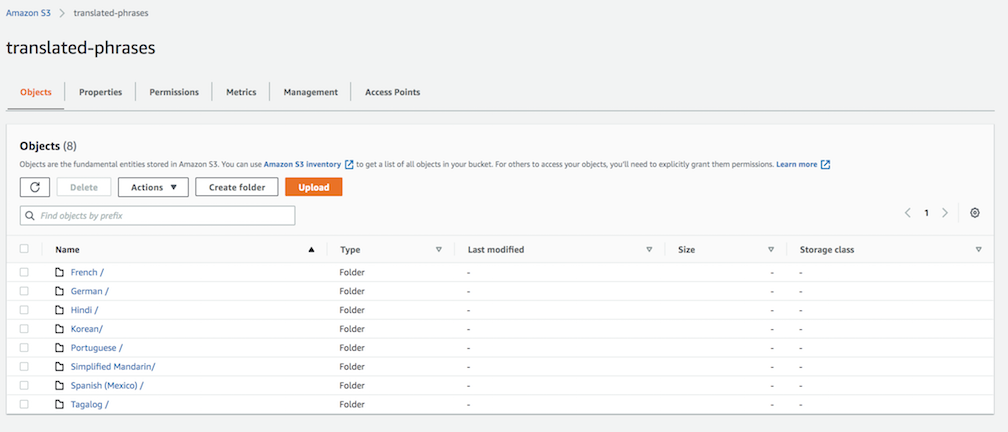

####Amazon Translate Batch Translations
After you have created your two buckets, folders, and stored all of your files, you are ready to begin translating the files. First, search for the Amazon Translate service and go to its portal. Click on Batch translation, which you can find on the left-hand side. Once you are there, your screen should show you Translation jobs.

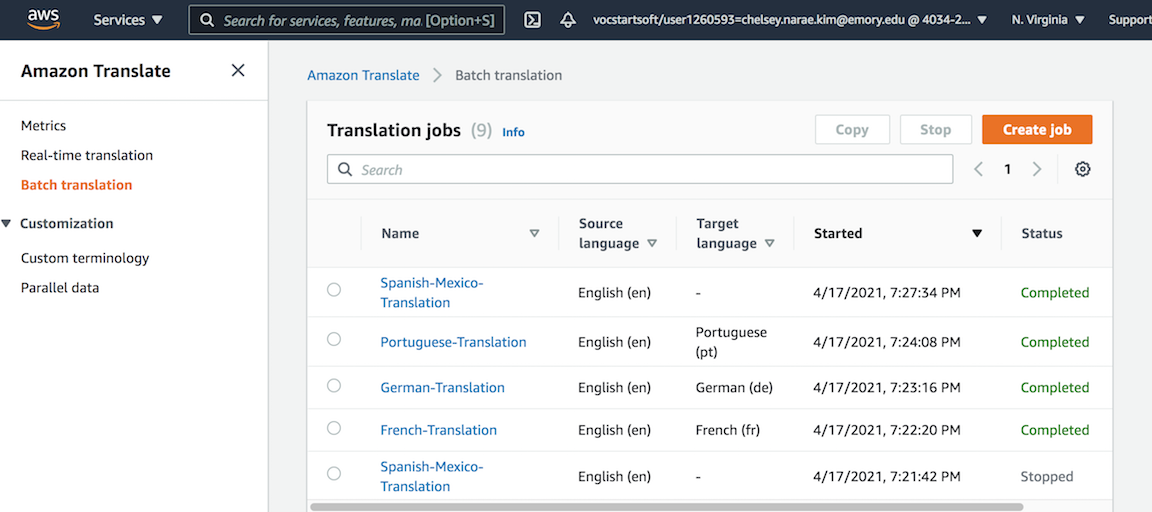

Click on the Create job button in the top right corner. This will lead you to a screen to create a translation job.

In the Job settings section, you will need to input a name for your transcription job and choose the source language and target language for your translations.

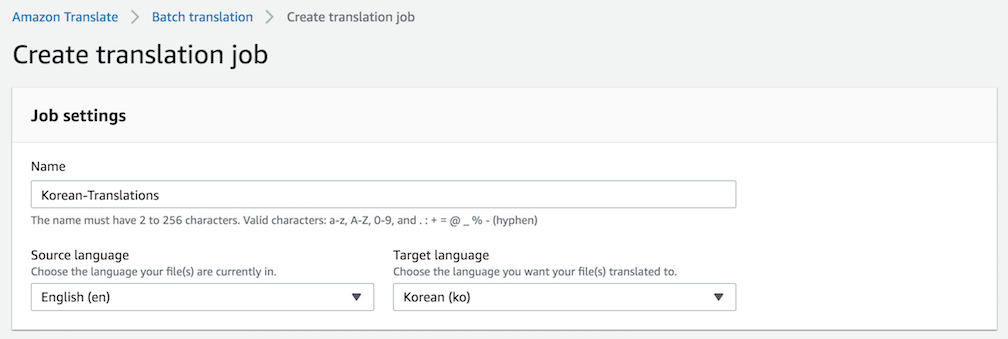

In the Input data section, you will need to input the S3 location of the bucket and folder with the original phrases you would like translated. You can click Select folder to find the S3 location you are looking for. Then, you must indicate the file format.

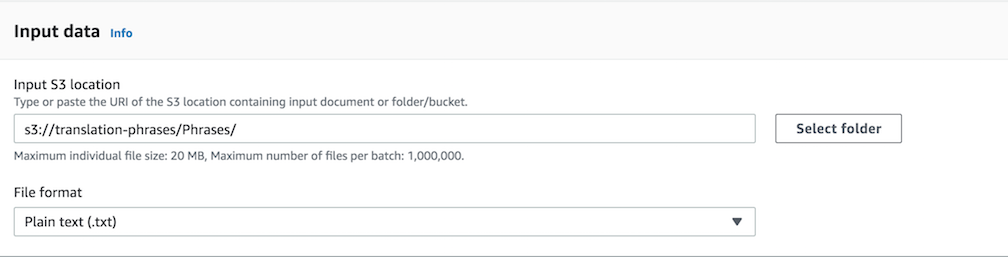

In the Output data section, you will need to input the S3 location of the bucket and folder where you would like to store the new translations. Again, you can click Select folder to find the S3 location you are looking for.

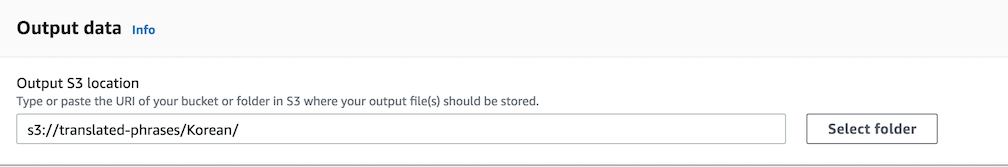

In our case, we do not use the Customization section but can learn more about this section on [AWS's walkthrough on batch translations](https://docs.aws.amazon.com/translate/latest/dg/how-custom-terminology.html). This section allows you to use custom terminology with your translation requests.

n the Access permissions section, you can either use an existing IAM role or create an IAM role. For our first translation job, we chose to create an IAM role giving them access to input and output S3 buckets. For the rest of our translation jobs, we used an existing IAM role which is the one that we created in our first translation job. For us, that role was called AmazonTranslateServiceRole-Translate.

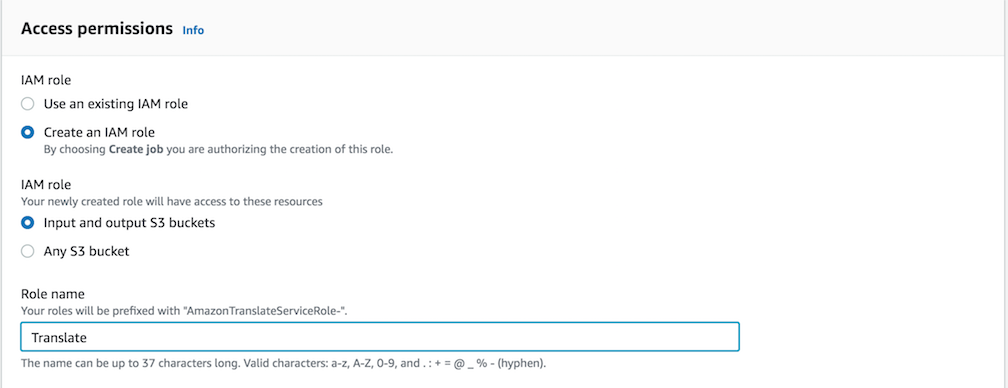

After you have input all of this information, click Create job at the bottom of the page. The translation job will now start working. Once it is complete, it will say completed in green in the status section.

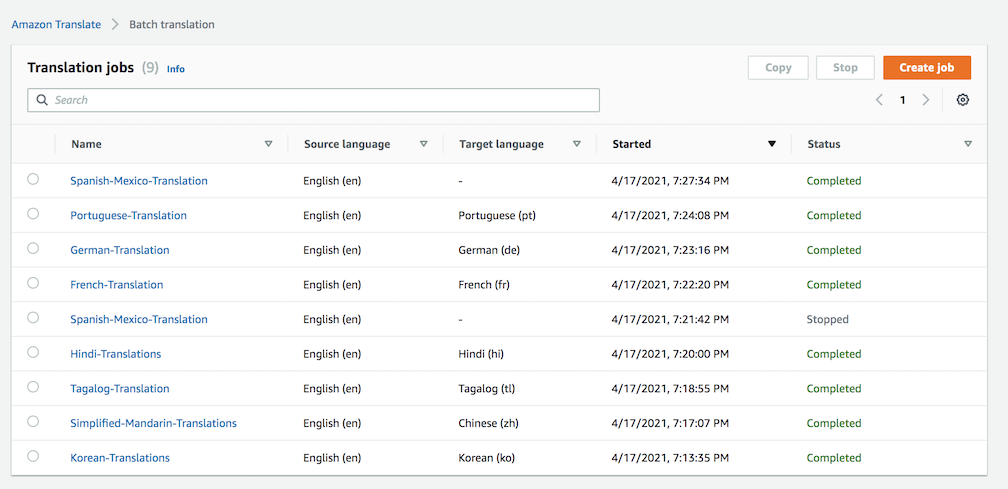

#### See the translations
Once the job is complete, you can find the translations in the bucket in which you indicated as the output location. You can do this by clicking on the job and then clicking the output file location in the bottom right corner, as in the image below. This will take you to the folder with all the new translated text files.


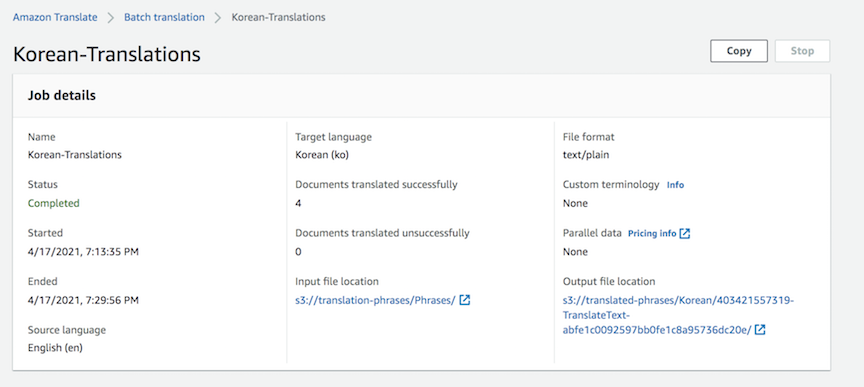

You can also go directly to the S3 bucket. Once you click on the folder you sent the data to, you will see a new folder and a temp file.

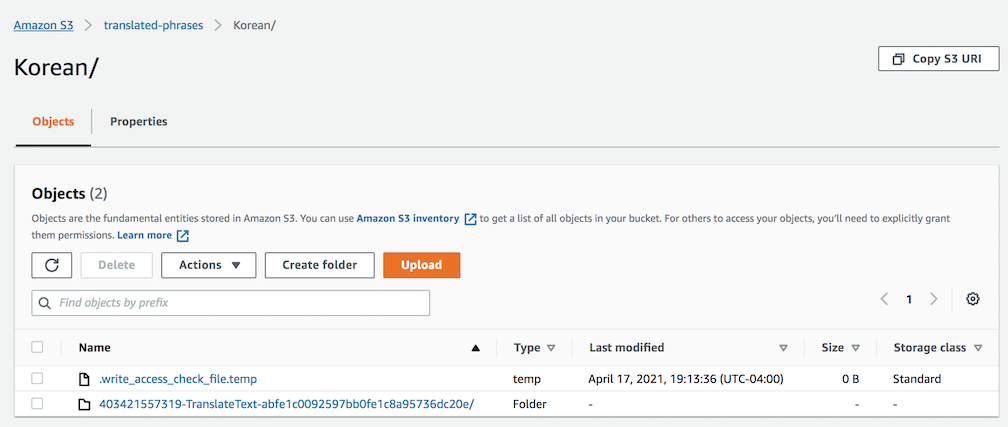

Click on the folder to see all of the new text files with the new translations. By clicking on the text file, you can then download it to see the translation.

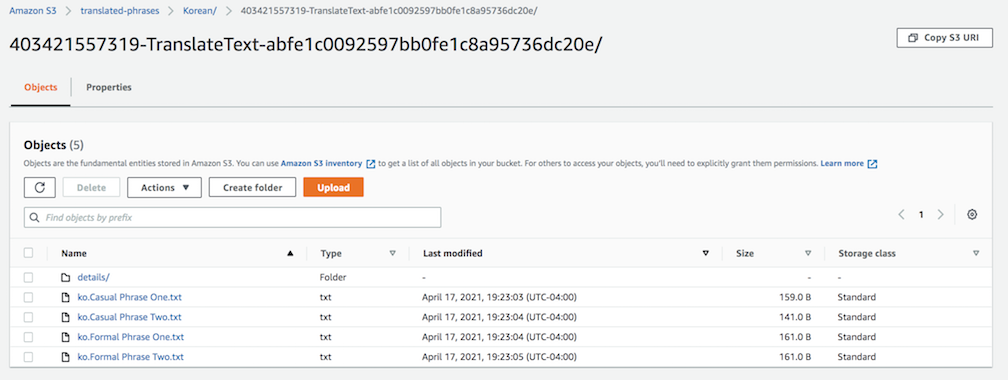

**For our project, we created 8 different batch translation jobs for each of the languages we wanted to analyse. Using the batch translation, we could efficiently translate 32 phrases.**

## Analysis of the Translations

### Collecting survey data 
We decided to test the AWS Translate model on four Asian languages: **Mandarin, Korean, Tagalog, and Hindi** and four European languages: **Spanish (Mexico), Portuguese, French and German**. We then sent out a survey to peers/relatives, Emory language professors, and posted on Reddit forums to get a wide sample of data. This survey showed the translations of all four phrases and asked participants to rate the accuracy (how well does the translation convey the meaning of the English phrase) and fluency (how natural does the sentence sound) of the translations from 1(worst) to 5(best). We also asked the participants to translate the phrases in their own words. 

We averaged the accuracy and fluency scores from each participant into a single "language score" for data visualization.

### Calculating accuracy 
Next, we took the AWS translations and a native translation and used [this](https://countwordsfree.com/comparetexts) website to compare the texts and calculate how similar they are to one another.

![picture](https://drive.google.com/uc?export=view&id=1_Xoe4_Ysx5fgD9h5uQiTi9cJmLPNiJ0F)

On this website, we pasted the AWS translation into the left panel and the native translation into the right panel. Then, we clicked "Compare", which generated a percentage of similarity that we used as our accuracy metric in our analysis.



## The Results

Please refer the "QTM350TricoloreFinalProjectAnalysis" in the following Github repository [here](https://github.com/samho22/QTM350) for an in-depth analysis of our findings, including linear regression and data visualizations. If you want to learn more about AWS Translate, Sagemaker, and its limitations, click on the link to visit our repository. 

In conclusion, AWS Translate fell short of our expectations. From our own languages (Hindi, Korean, Tagalog, and Mandarin), we did not fell as though the translated phrases were sufficient to speak in a normal conversation, and definitely not in a formal message. From our survey with native speakers of all 8 languages ( Hindi, Korean, Tagalog, Mandarin, Spanish, Portuguese, French, and German), the majority of the responses rated the AWS translations low in both accuracy and fluency. We expected the slang phrases to be poorly translated, but we were hoping the formal translations would be most accurate and could be useful for international work purposes. However, even the formal translations were sometimes not appropriate to speak to an elder or superior. Therefore, AWS Translate should not be used as a translation tool when travelling or when conducting international diplomacy. We should stick to Google Translate.

Thanks for reading our blog, and we hope you learned more about AWS Translate!

## Authors 
Chelsey Kim, Vyas Muralidharan, Angela Guevarra, Samantha Ho